In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
Img_size=224
batch_size=32

In [3]:
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2
)

In [5]:
train_generator=train_datagen.flow_from_directory(
    "/content/drive/MyDrive/alzheimer/train",
    target_size=(Img_size,Img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 3200 images belonging to 4 classes.


In [6]:
val_generator=train_datagen.flow_from_directory(
    "/content/drive/MyDrive/alzheimer/train",
    target_size=(Img_size,Img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 800 images belonging to 4 classes.


In [7]:
class_indices = train_generator.class_indices
class_names = list(class_indices.keys())
print("Class indices:", class_indices)
print("Class names:", class_names)

Class indices: {'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}
Class names: ['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']


In [8]:
model=keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(Img_size, Img_size, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(4, activation='softmax'),
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(train_generator,epochs=5,validation_data=val_generator,batch_size=batch_size)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 1492s 15s/step - accuracy: 0.3537 - loss: 1.4094 - val_accuracy: 0.5450 - val_loss: 1.0505
Epoch 2/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 474s 5s/step - accuracy: 0.6170 - loss: 0.8565 - val_accuracy: 0.5813 - val_loss: 0.9177
Epoch 3/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 476s 5s/step - accuracy: 0.7496 - loss: 0.6159 - val_accuracy: 0.6475 - val_loss: 0.8215
Epoch 4/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 432s 4s/step - accuracy: 0.8353 - loss: 0.4279 - val_accuracy: 0.6500 - val_loss: 0.9827
Epoch 5/5
100/100 ━━━━━━━━━━━━━━━━━━━━ 396s 4s/step - accuracy: 0.8970 - loss: 0.2857 - val_accuracy: 0.6712 - val_loss: 0.9242


In [12]:
model.save("/content/drive/MyDrive/alzheimer/train/alzhimer.h5")

In [13]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model("/content/drive/MyDrive/alzheimer/train/alzhimer.h5")
print("model loaded")

model loaded


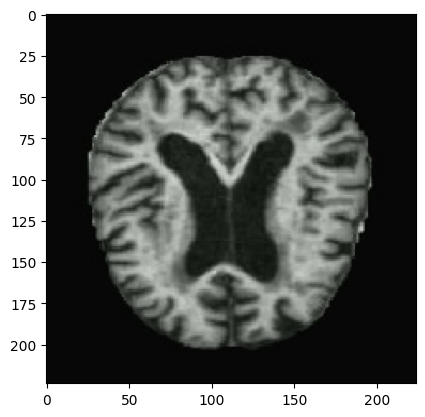

In [14]:
test_image_path="/content/drive/MyDrive/alzheimer/train/MildDemented/00046ff7-0fae-4796-9a2b-2df47095bfe6.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [15]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array=img_array/255.0

In [18]:
prediction=model.predict(img_array)
ind = np.argmax(prediction[0])
print(class_names[ind])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
MildDemented
